### TITLE : Bank Customer Churn Prediction




### OBJECTIVE : Based on some fetures We gonabe Predict that haw much Sales is done And What is our net profit




###DATA SOURCE : From Ybi foundation github reposetory we get the data

##Inport Library

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

##Import Data

In [2]:
Data = pd.read_csv("https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Bank%20Churn%20Modelling.csv")
Data.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
Data.sample(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
8997,15631063,Trentino,710,France,Female,33,2,0.00,2,1,0,72945.32,0
9261,15677117,Crawford,629,France,Female,61,6,0.00,2,1,1,133672.61,0
4740,15618661,Chidubem,535,France,Male,30,6,103804.97,1,1,1,125710.53,0
520,15671256,Macartney,850,France,Female,35,1,211774.31,1,1,0,188574.12,1
7459,15583724,Raymond,645,Spain,Female,29,4,0.00,2,1,1,74346.11,0


##Describe The data

In [6]:
Data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


###Data preprocessing

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [4]:
Data.nunique()

CustomerId          10000
Surname              2932
CreditScore           460
Geography               3
Gender                  2
Age                    70
Tenure                 11
Balance              6382
Num Of Products         4
Has Credit Card         2
Is Active Member        2
Estimated Salary     9999
Churn                   2
dtype: int64

In [7]:
Data.isnull()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
Data.isnull().sum()

CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

In [10]:
Data['Gender'] = Data['Gender'].apply(lambda x: 1 if str(x) != 'Female' else 0)

In [13]:
Data.sample(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
7322,15721507,Pagan,713,France,0,32,1,117094.02,1,0,0,149558.83,1
7349,15717629,Docherty,632,Germany,1,42,6,59972.26,2,0,1,148172.94,0
7689,15777452,Sauve,587,France,0,46,6,88820.29,1,0,0,70224.34,0
1023,15682639,Marshall,642,France,1,32,3,0.00,2,1,1,88698.83,0
9293,15571917,Eluemuno,771,Germany,0,38,5,137657.71,2,1,0,72985.61,0


In [32]:
Data.drop("Geography", axis=1, inplace= True)

In [33]:
Data.drop("Surname", axis=1, inplace =True)

In [34]:
Data.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0


##Data Visulization

In [36]:
sns.pairplot(Data)

Output hidden; open in https://colab.research.google.com to view.

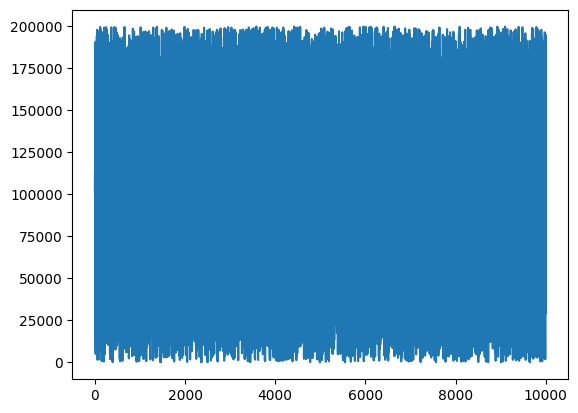

In [38]:
plt.plot(Data["Estimated Salary"])

<ipython-input-42-bc28b369b6bd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data["Churn"])


<Axes: xlabel='Churn', ylabel='Density'>

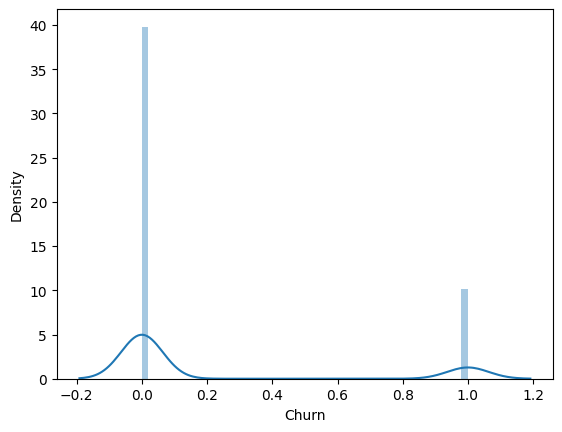

In [42]:
sns.distplot(Data["Churn"])

<Axes: xlabel='Age', ylabel='Estimated Salary'>

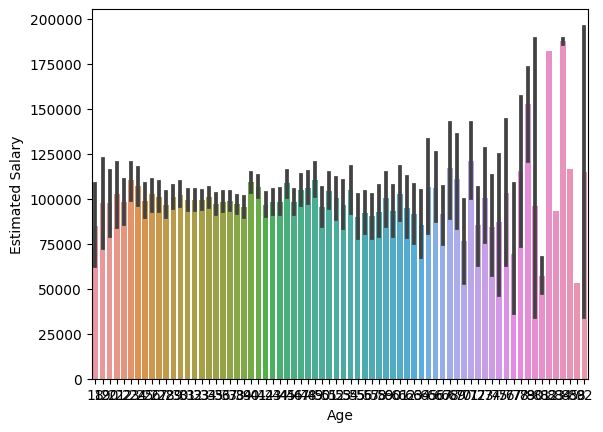

In [44]:
sns.barplot(x=Data["Age"],y=Data["Estimated Salary"])

##Define Target Variable (y) and Feature Variables (X)

In [47]:
X=Data.iloc[:,0:10]

In [48]:
X

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary
0,15634602,619,0,42,2,0.00,1,1,1,101348.88
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57
3,15701354,699,0,39,1,0.00,2,0,0,93826.63
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,39,5,0.00,2,1,0,96270.64
9996,15569892,516,1,35,10,57369.61,1,1,1,101699.77
9997,15584532,709,0,36,7,0.00,1,0,1,42085.58
9998,15682355,772,1,42,3,75075.31,2,1,0,92888.52


In [50]:
y=Data["Churn"]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Churn, Length: 10000, dtype: int64

##Train Test Split

In [51]:
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size=0.2, random_state=8)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000,)
(2000,)


##Modeling

In [54]:
Rfc = RandomForestClassifier()

In [55]:
Model =Rfc.fit(X_train,y_train)

In [56]:
Model

RandomForestClassifier()

##Model Evaluation

In [57]:
y_pred=Model.predict(X_test)

In [58]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [59]:
Model.score(X_test,y_test)

0.8575

##Model Prediction

In [61]:
print(Model.predict([[15634602,619,0,42,2,0.00,1,1,1,101348.88]]))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Explanation

In [63]:
"""it is a bank customer churn model that can able to predict the churn through diffrent type of paramitter"""

'it is a bank customer churn model that can able to predict the churn through diffrent type of paramitter'